In [2]:
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score 
import pandas
import matplotlib.pyplot as plt

In [3]:
#importando dados
df = pandas.read_csv('./iris.csv')
# df['target'].value_counts()

In [4]:
#dividindo em 80:20
treino,teste = train_test_split(df, test_size=0.2, random_state=13, shuffle=True,stratify=df.target)

# display(a['target'].value_counts())
# display(b['target'].value_counts())
# treino

/home/afonsolpjr/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/afonsolpjr/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/afonsolpjr/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/afonsolpjr/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/afonsolpjr/.local/lib/pyth

,Nº Fold,Score de Treinamento,Score de Teste
0,1,0.916667,1.000000
1,2,0.947917,0.875000
2,3,0.947917,0.958333
3,4,0.906250,0.916667
4,5,0.958333,0.875000


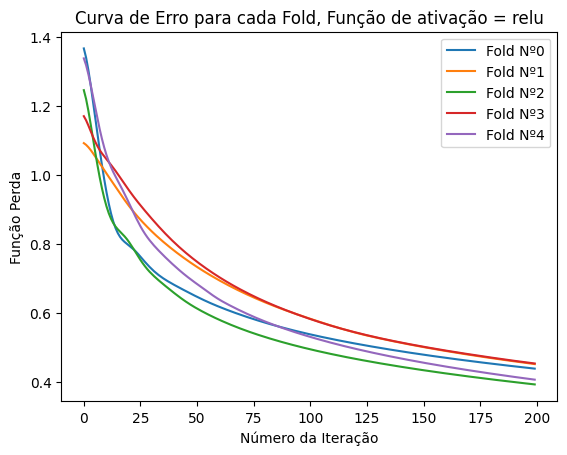

/home/afonsolpjr/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/afonsolpjr/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/afonsolpjr/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/afonsolpjr/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/afonsolpjr/.local/lib/pyth

,Nº Fold,Score de Treinamento,Score de Teste
0,1,0.687500,0.708333
1,2,0.718750,0.750000
2,3,0.739583,0.708333
3,4,0.739583,0.666667
4,5,0.697917,0.666667


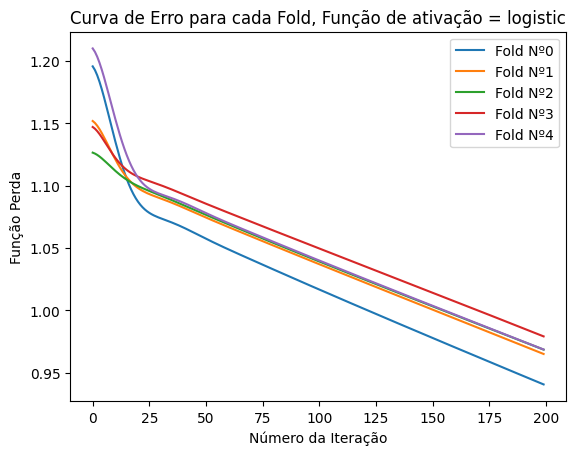

/home/afonsolpjr/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/afonsolpjr/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/afonsolpjr/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/afonsolpjr/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/afonsolpjr/.local/lib/pyth

,Nº Fold,Score de Treinamento,Score de Teste
0,1,0.968750,1.000000
1,2,0.968750,0.916667
2,3,0.979167,0.958333
3,4,0.937500,1.000000
4,5,0.989583,0.875000


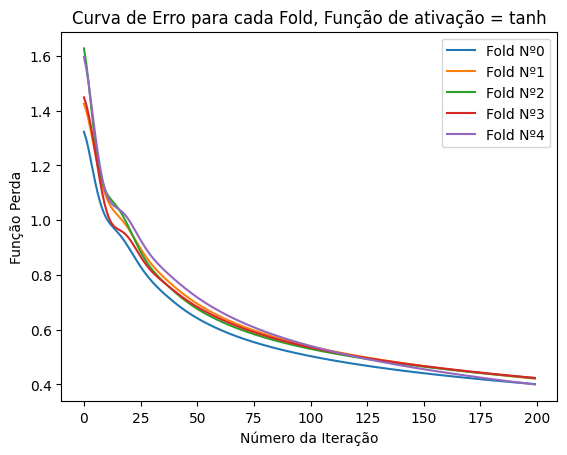

In [ ]:
#Modelo de validação cruzada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)

funcoes_ativacao = ['relu','logistic','tanh']
for f_ativ in funcoes_ativacao:
    i=1
    #Criando lista para receber score e a curva da função perda de cada fold
    dados_dos_modelos = []
    curva_perdas = []
    for indices_treino,indices_teste in skf.split(treino,treino.target):
        modelo = MLPClassifier(activation=f_ativ,solver='sgd',hidden_layer_sizes=(100),early_stopping=False)
        # display(indices_treino)
        # display(indices_teste)
        
        modelo.fit(treino.drop(columns='target').iloc[indices_treino],treino.target.iloc[indices_treino])
        
        score_treino = modelo.score(
            treino.drop(columns='target').iloc[indices_treino],
            treino.target.iloc[indices_treino]
        )
        score_teste = modelo.score(
            treino.drop(columns='target').iloc[indices_teste],
            treino.target.iloc[indices_teste]
        ) 
        curva_perdas.append(modelo.loss_curve_)
        dados_dos_modelos.append({'Nº Fold': i,
                                 'Score de Treinamento': score_treino,
                                 'Score de Teste': score_teste})
        i+=1
    #Criando da
    display(pandas.DataFrame(dados_dos_modelos))
    fig,ax = plt.subplots()
    
    for i in range(0,len(curva_perdas)):
        ax.plot(range(len(curva_perdas[i])),curva_perdas[i],label="Fold Nº{}".format(i))
        plt.title("Curva de Erro para cada Fold, Função de ativação = " + f_ativ)
        plt.xlabel("Número da Iteração")
        plt.ylabel("Função Perda")
        plt.legend()
    
    plt.show()

/home/afonsolpjr/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Função de ativação,Score Treinamento,Score_Teste
0,tanh,0.966667,0.966667


Text(0.5, 1.0, 'Curva de Erro para função de ativação tanh')

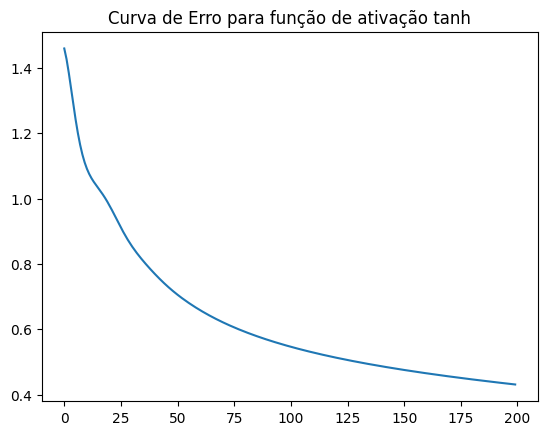

In [34]:
# A função de ativação com melhor desempenho foi a tangente hiperbólica.
# Treinaremos um novo modelo com os 80% dos dados totais.

modelo = MLPClassifier(activation='tanh',solver='sgd',hidden_layer_sizes=(100),early_stopping=False)

modelo.fit(treino.drop(columns='target'),treino.target)

score_treinamento = modelo.score(treino.drop(columns='target'),treino.target)

score_teste = modelo.score(teste.drop(columns='target'),teste.target)

display(pandas.DataFrame([{'Função de ativação':'tanh','Score Treinamento' : score_treinamento,
                        'Score_Teste': score_teste}]))

fig,ax = plt.subplots()

ax.plot(range(len(modelo.loss_curve_)),modelo.loss_curve_)
plt.title("Curva da função perda, para função de ativação tanh")

In [25]:
{'Score Treinamento' : score_treinamento,
                        'Score_Teste': score_teste}

{'Score Treinamento': 0.9583333333333334, 'Score_Teste': 0.9666666666666667}